<a href="https://colab.research.google.com/github/ovsilya/code_portfolio_examples/blob/master/KernelDensityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import seaborn as sns

!pip install PyAstronomy
from PyAstronomy import pyaC

     |████████████████████████████████| 675kB 2.8MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.14.0-cp36-none-any.whl size=468080 sha256=fc98ecdb19177e2ee275721bf586d24647962d66497814313168c0d7194a813c
  Stored in directory: /root/.cache/pip/wheels/5e/e6/47/e88ed41a075b45884471ca381b0c4e4dd46df21736f4e14fa8
Successfully built PyAstronomy


In [0]:
%matplotlib inline

In [0]:
feature = 'behaviour'
data = pd.read_csv("/content/activity_data_behaviour_new.csv")
#/content/activity_data_behaviour_new.csv
#/content/drive/My Drive/Colab Notebooks/activity_data_behaviour_new.csv
X = data['engagement_index'].to_numpy()[:, np.newaxis]

print("data has been loaded to the program!")

N_days_of_the_period = 131
bandwidth = 65
x_axis = -0.5
y_axis = 20
N = N_days_of_the_period * 10
n_bins = 2000

data has been loaded to the program!


# New Section

Figures have been initiated!


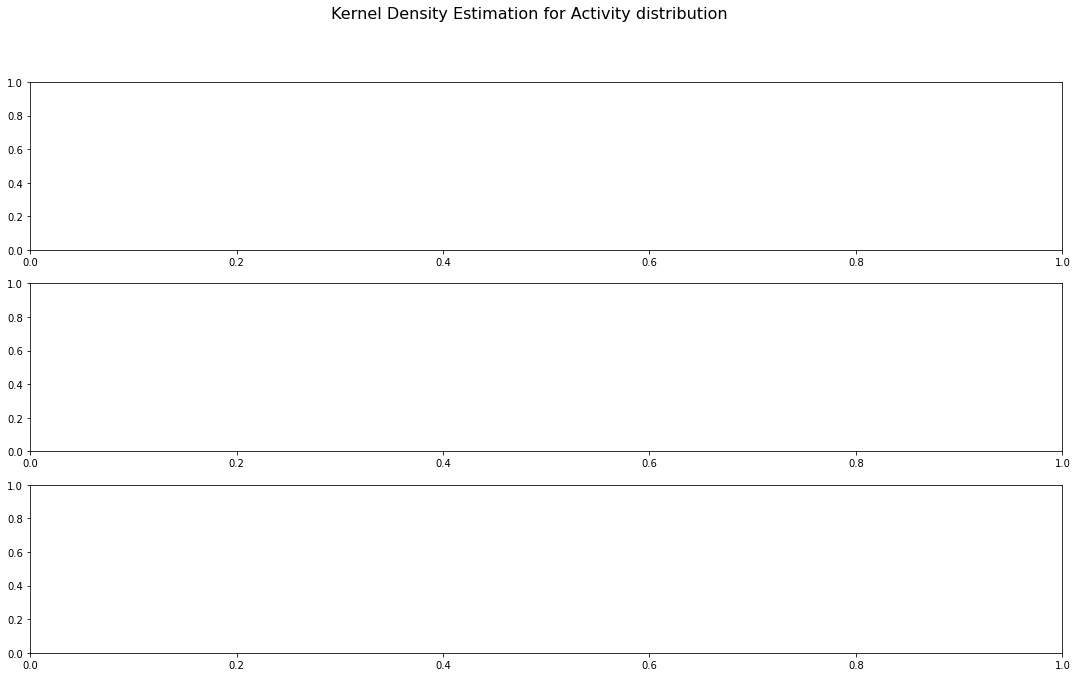

In [0]:
X_plot = np.linspace(-0.5, 150, N)[:, np.newaxis]
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Kernel Density Estimation for Activity distribution', fontsize=16)
print("Figures have been initiated!")

In [0]:
# ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

for kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth * 0.01).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax1.plot(X_plot[:, 0], np.exp(log_dens), '-', label="kernel = '{0}'".format(kernel))

# (we try multiple kernels above but calculate gradient for only one)
kde_2 = KernelDensity(kernel='epanechnikov', bandwidth=bandwidth * 0.01).fit(X)
log_dens_2 = kde_2.score_samples(X_plot)
print("Model has been created!")

Model has been created!


In [0]:

ax1.legend(loc='upper right')
ax1.set_xlim(x_axis, y_axis)
ax1.set_ylim(-0.02, 1.0)
ax1.set_title('Activity Score Distribtuion & KDE:', fontsize=12)
sns.distplot(X, bins=n_bins, kde=False, rug=False, norm_hist=True, ax=ax1, color="grey", label="activity score distribution")

# ------------------------------------
diff = np.gradient(log_dens_2)
diff_list = list(diff)
xc_1, xi_1 = pyaC.zerocross1d(X_plot[:, 0], diff, getIndices=True)

ax2.set_xlim(x_axis, y_axis)
ax2.set_ylim(-0.5, 1.0)
ax2.axhline(y=0, color="black")
ax2.set_title('First derivative over KDE Function (epanechnikov):', fontsize=12)
ax2.plot(X_plot[:, 0], diff, color="red")
ax2.plot(X_plot[xi_1[1], 0], diff_list[xi_1[1]], marker='*', markersize=10, color="blue")

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1057: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1085: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
/usr/local/lib/python3.6/dist-packages/PyAstronomy/pyaC/mtools/zerocross.py:43: RuntimeWarning: invalid value encountered in less
  indi = np.where(y[1:]*y[0:-1] < 0.0)[0]


In [0]:
diff_2 = np.gradient(diff)
diff_2_list = list(diff_2)
xc_2, xi_2 = pyaC.zerocross1d(X_plot[:, 0], diff_2, getIndices=True)

ax3.set_xlim(x_axis, y_axis)
ax3.set_ylim(-0.5, 0.5)
ax3.axhline(y=0, color="black")
ax3.set_title('Second derivative over KDE Function (epanechnikov):', fontsize=12)
ax3.plot(X_plot[:, 0], diff_2, color="red")
ax3.plot(X_plot[xi_2[0], 0], diff_2_list[xi_2[0]], marker='*', markersize=10, color="blue")

/usr/local/lib/python3.6/dist-packages/PyAstronomy/pyaC/mtools/zerocross.py:43: RuntimeWarning: invalid value encountered in less
  indi = np.where(y[1:]*y[0:-1] < 0.0)[0]


In [0]:
print('N of points: {} |'.format(N),
      'kernel bandwidth: {} |'.format(bandwidth),
      'N frequency distribution bins: {} |'.format(n_bins))
print ('{}: '.format(feature))
print('Low-activity threshold:', X_plot[xi_2[0], 0])
print('High-activity threshold:', X_plot[xi_1[1], 0])

ax3.text(y_axis / 2, -0.85, 'Low-activity threshold: {}  High-activity threshold: {}'.format(X_plot[xi_2[0], 0], X_plot[xi_1[1], 0]),
         horizontalalignment='center',
        verticalalignment='center', fontsize=14)
ax3.text(y_axis / 2, -0.75, 'N of points: {} | kernel bandwidth: {} | N frequency distribution bins: {}'.format(N, bandwidth, n_bins),
         horizontalalignment='center',
        verticalalignment='center', fontsize=14)

# print(X_plot[xi_1[1], 0], log_dens_2[xi_2[0]])
# print(X_plot[xi_2[0], 0], log_dens_2[xi_2[0]])

ax1.plot(X_plot[xi_1[1], 0], np.exp(log_dens_2[xi_1[1]]), marker='*', markersize=10, color="blue")
ax1.plot(X_plot[xi_2[0], 0], np.exp(log_dens_2[xi_2[0]]), marker='*', markersize=10, color="blue")
# -----------------------------------------------------------------------
# fig.show()
fig.savefig('behaviour_222{}.png'.format(bandwidth), dpi=200)
# plt.show()

N of points: 1310 | kernel bandwidth: 65 | N frequency distribution bins: 2000 |
behaviour: 
Low-activity threshold: 0.53475935828877
High-activity threshold: 6.858288770053476


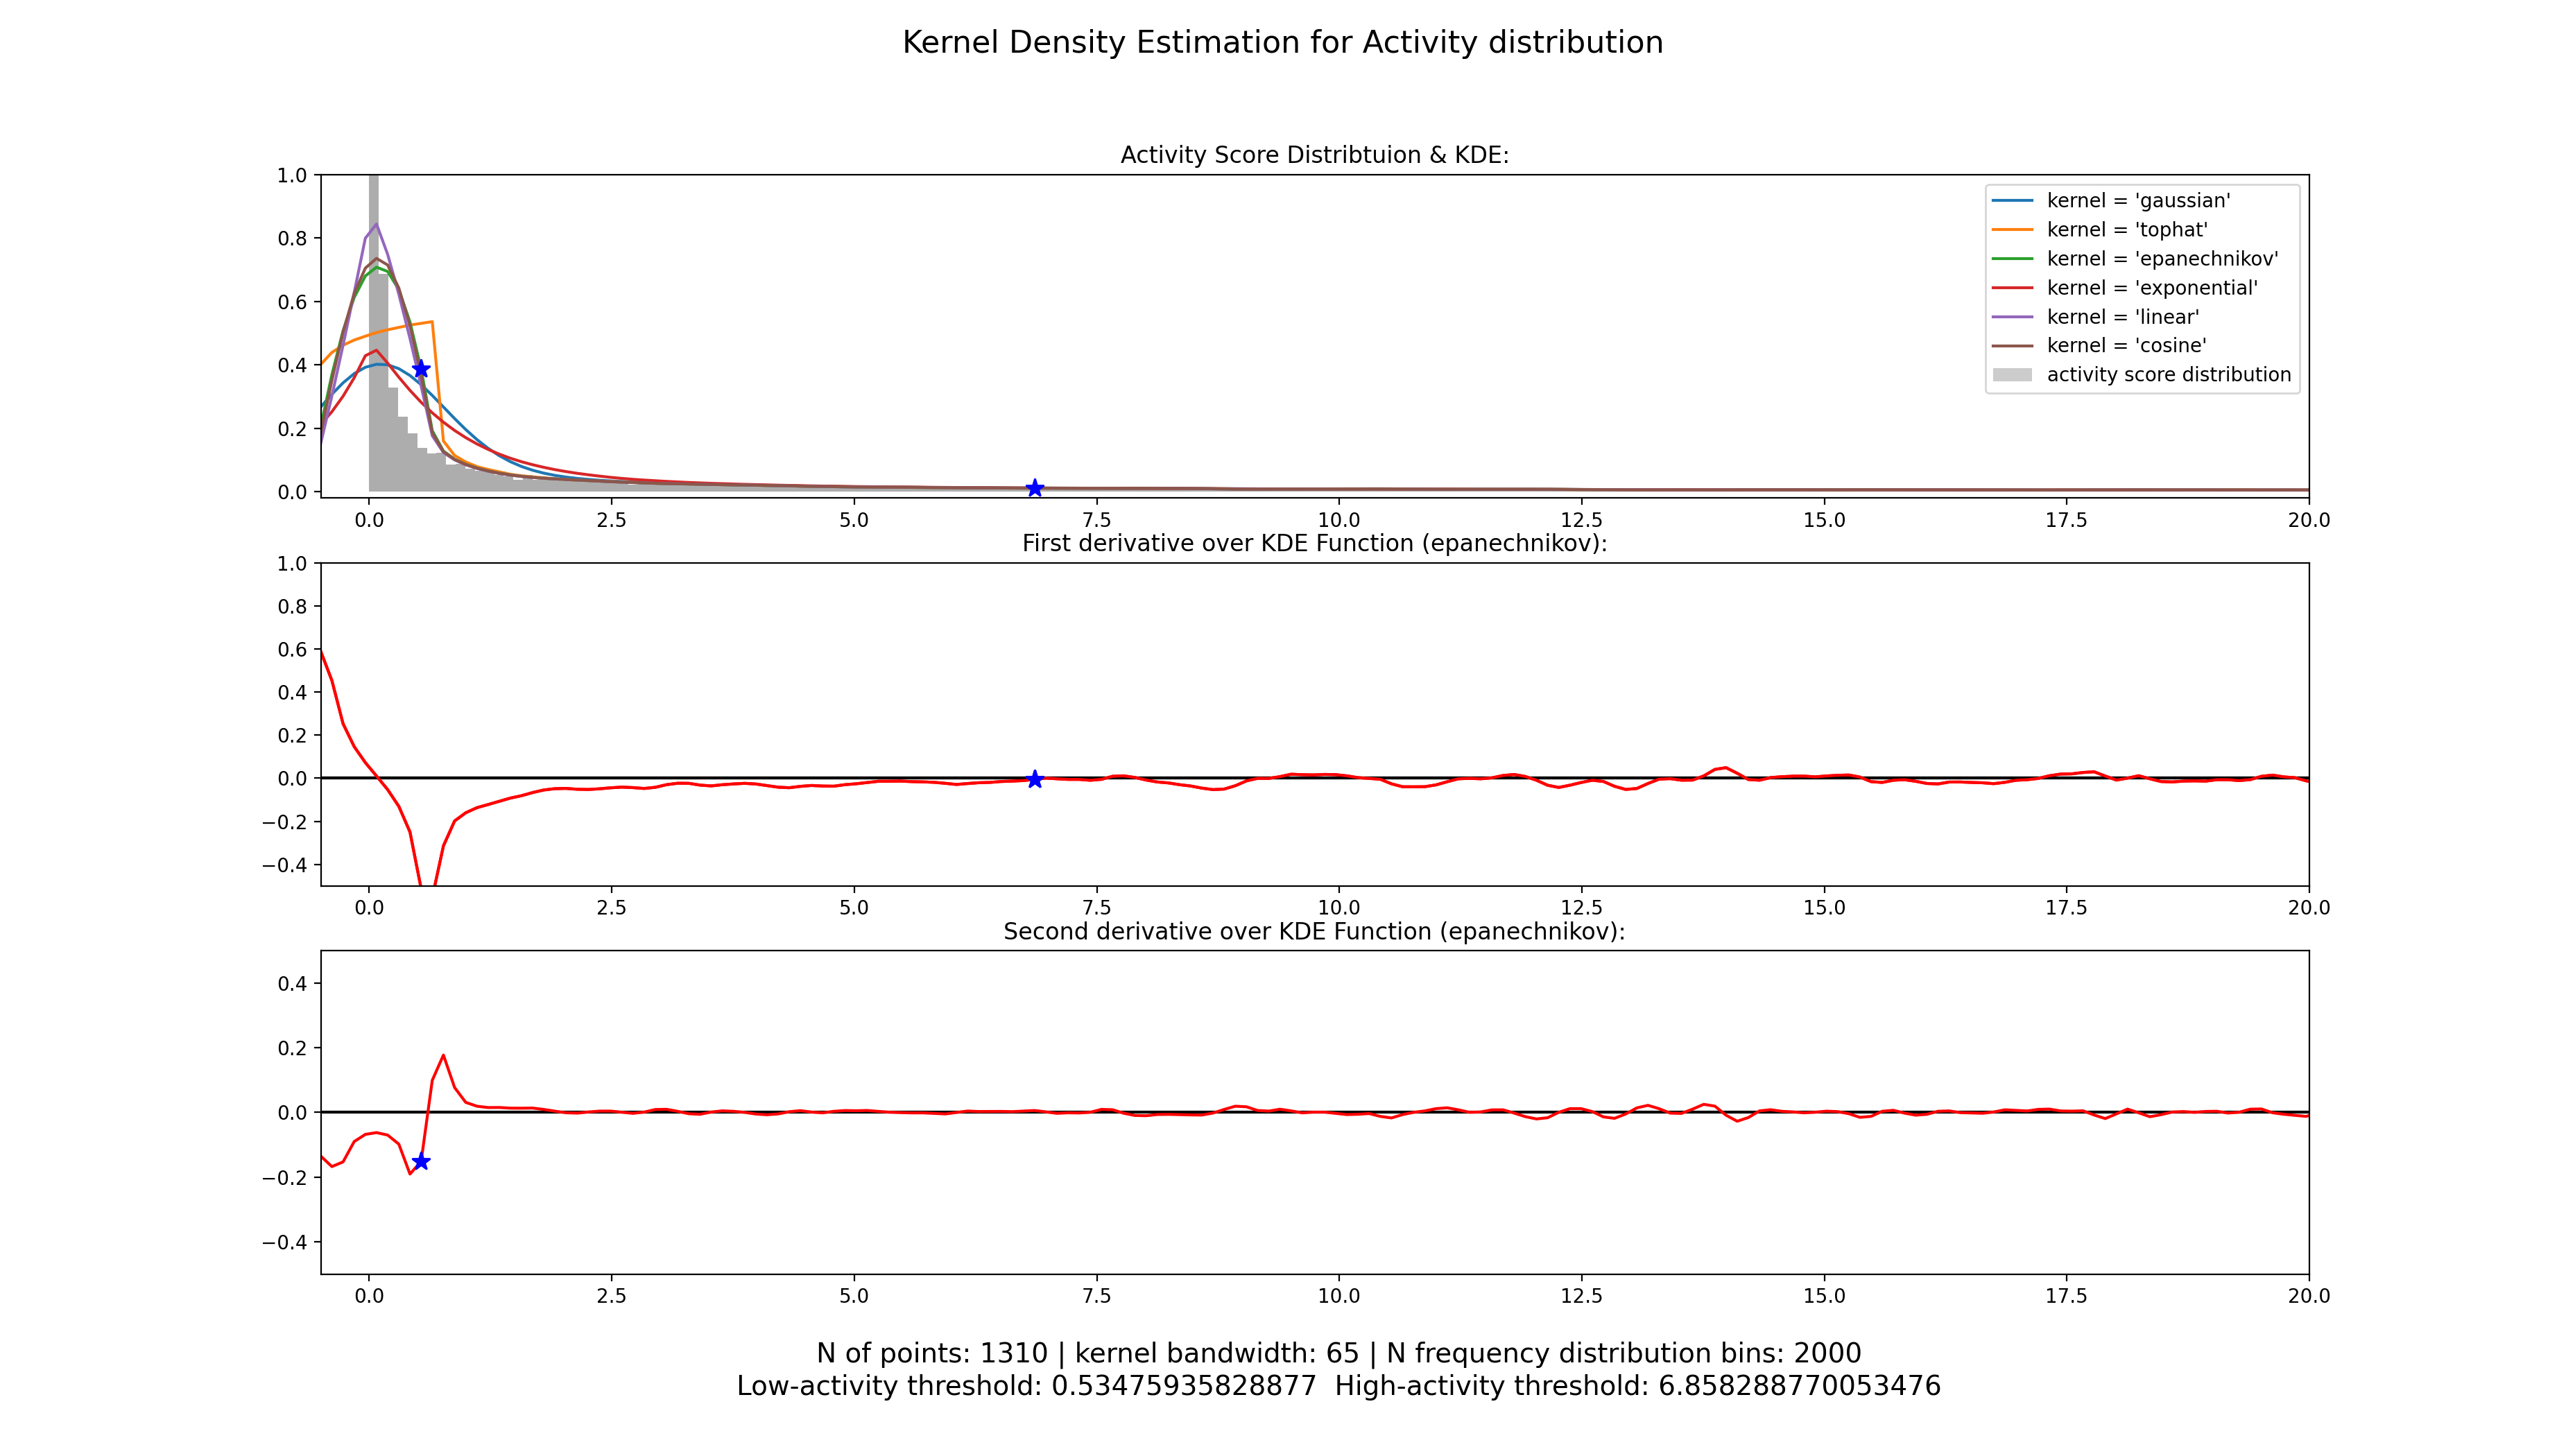

In [0]:
from IPython.display import Image
Image('behaviour_22265.png', width=800, height=500)